In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
trainData = pd.read_csv("train.csv")

### Datasetin incelenmesi

In [5]:
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
testData = pd.read_csv("test.csv")

In [7]:
testData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Training ve Test Set'teki eksik değerlerin görselleştirilmesi

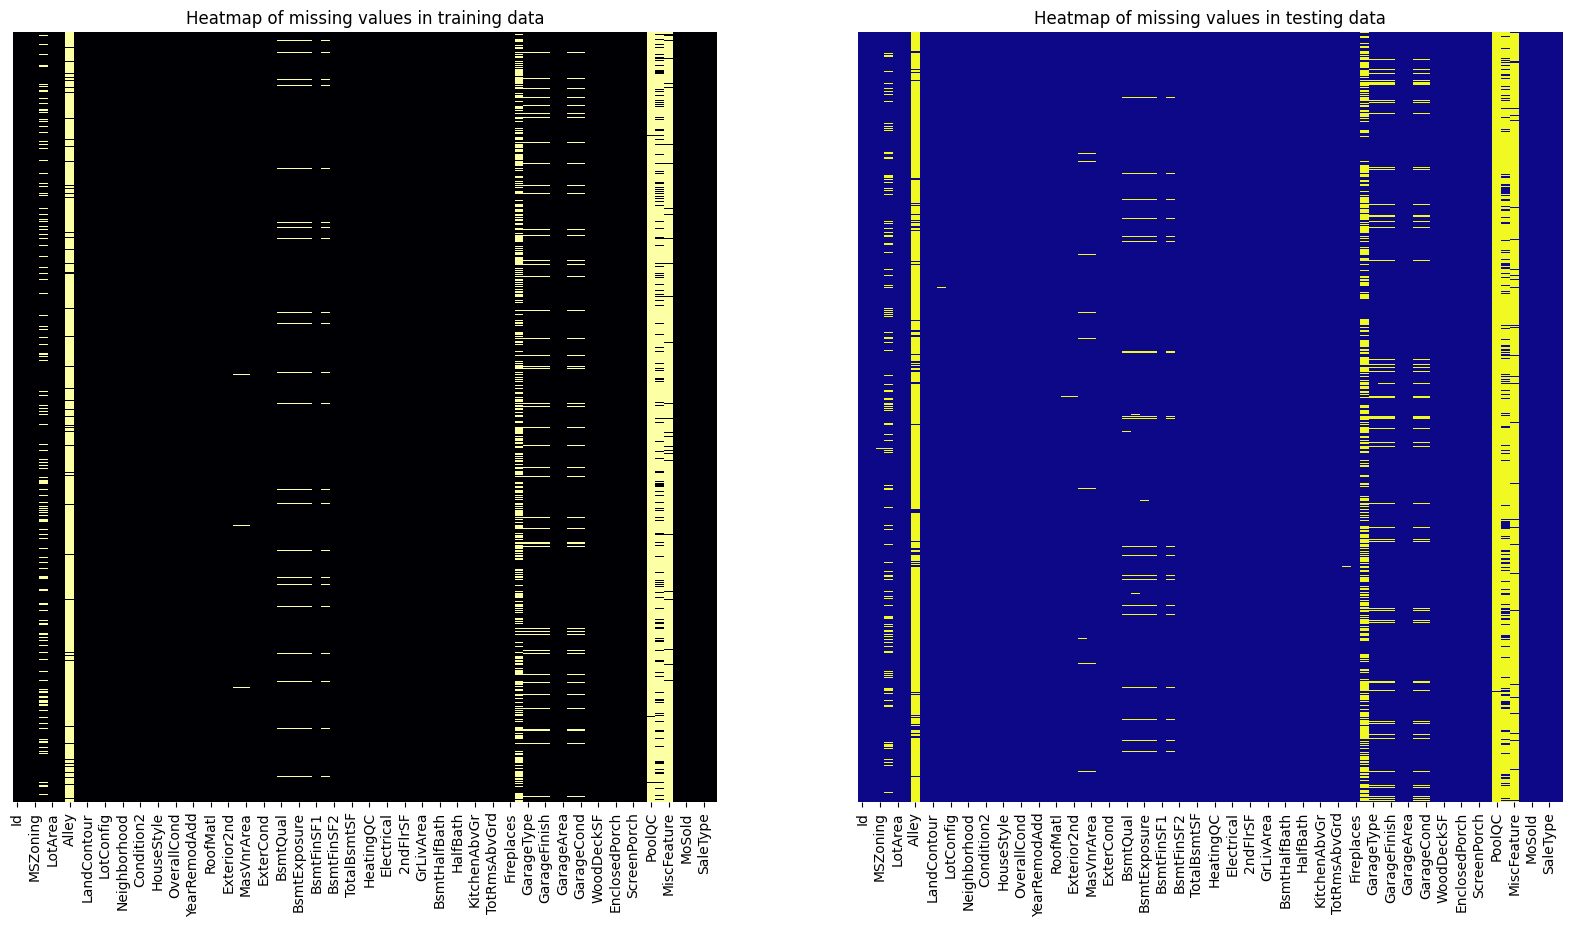

In [8]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
sns.heatmap(ax=axes[0], yticklabels=False, data=trainData.isnull(), cbar=False, cmap="inferno")
sns.heatmap(ax=axes[1], yticklabels=False, data=testData.isnull(), cbar=False, cmap="plasma")
axes[0].set_title('Heatmap of missing values in training data')
axes[1].set_title('Heatmap of missing values in testing data')
plt.show()


#### Training Set'teki eksik değerlerin bar plot ile gösterimi

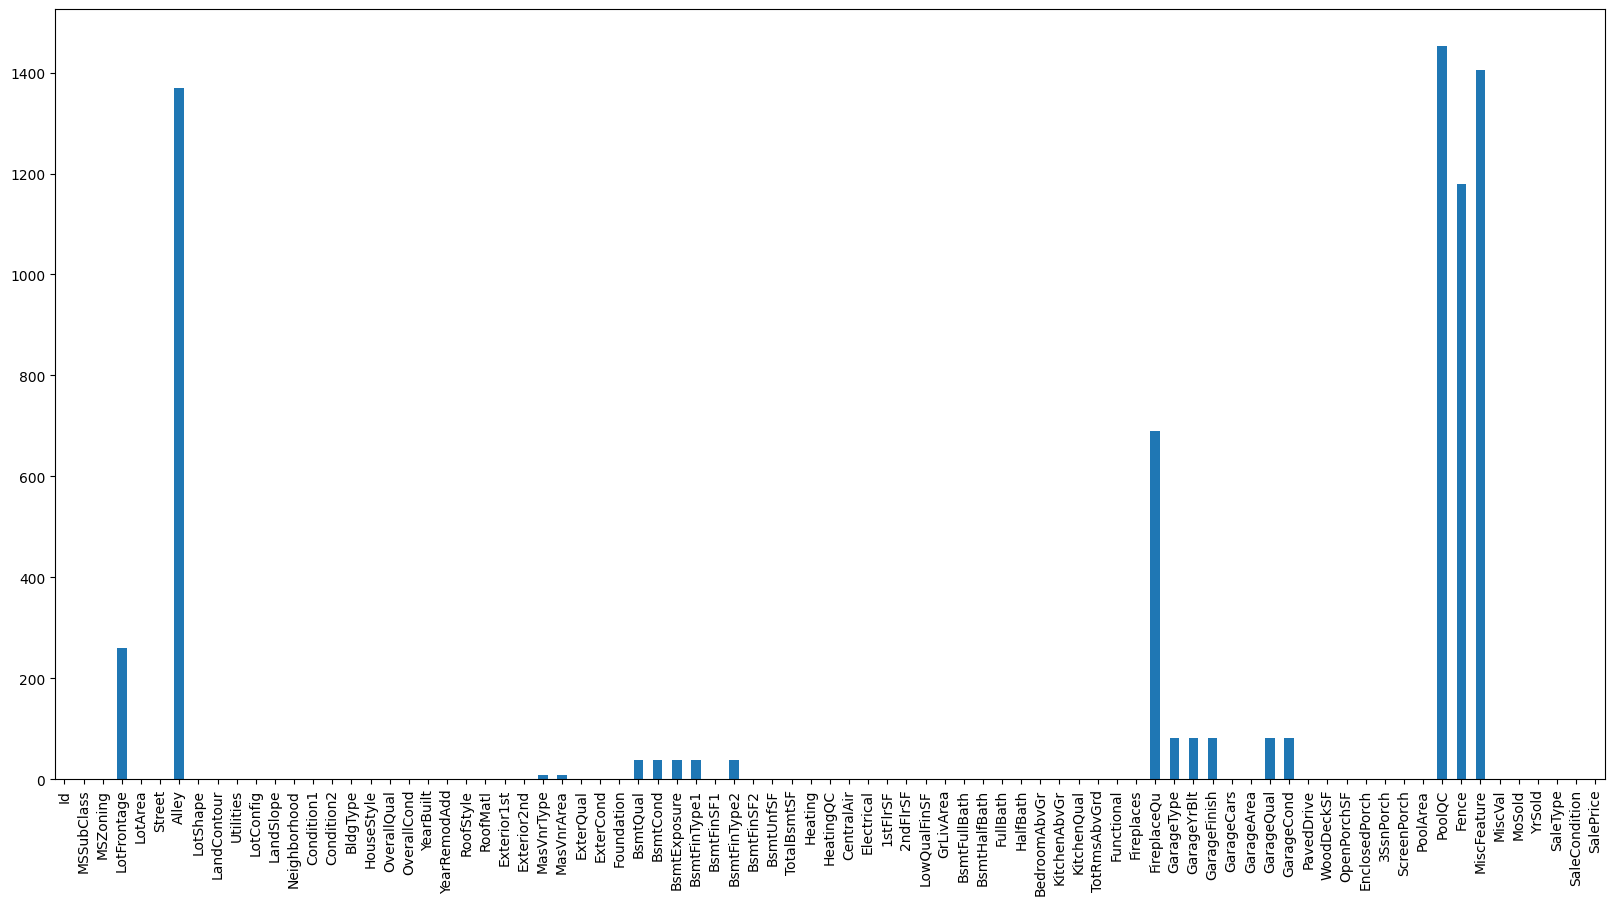

In [9]:
trainData.isna().sum().plot(kind="bar", figsize=(20,10))
plt.show()

#### Test Set'teki eksik değerlerin bar plot ile gösterimi

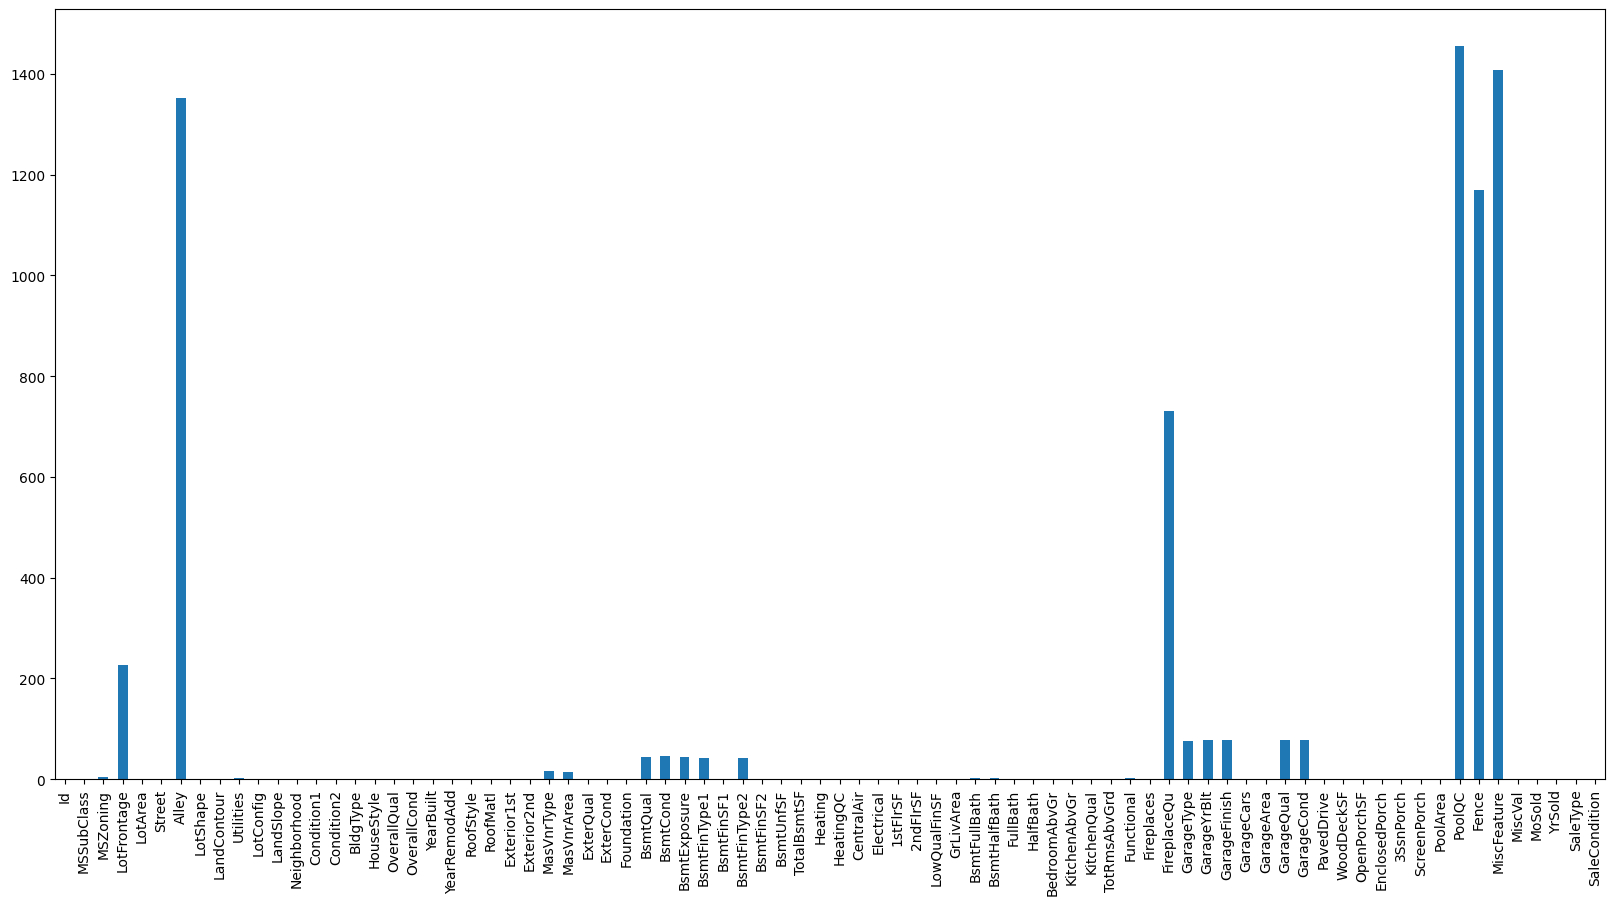

In [10]:
testData.isna().sum().plot(kind="bar", figsize=(20,10))
plt.show()

### Data Set'teki null değerlerin sayısı

In [11]:
trainData.isnull().sum().sum()

6965

In [12]:
testData.isnull().sum().sum()

7000

In [13]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Verisetinin korelasyon heatmapi:

<ipython-input-15-6503d4bc7cf8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(trainData.corr(), cmap="inferno", annot=True)


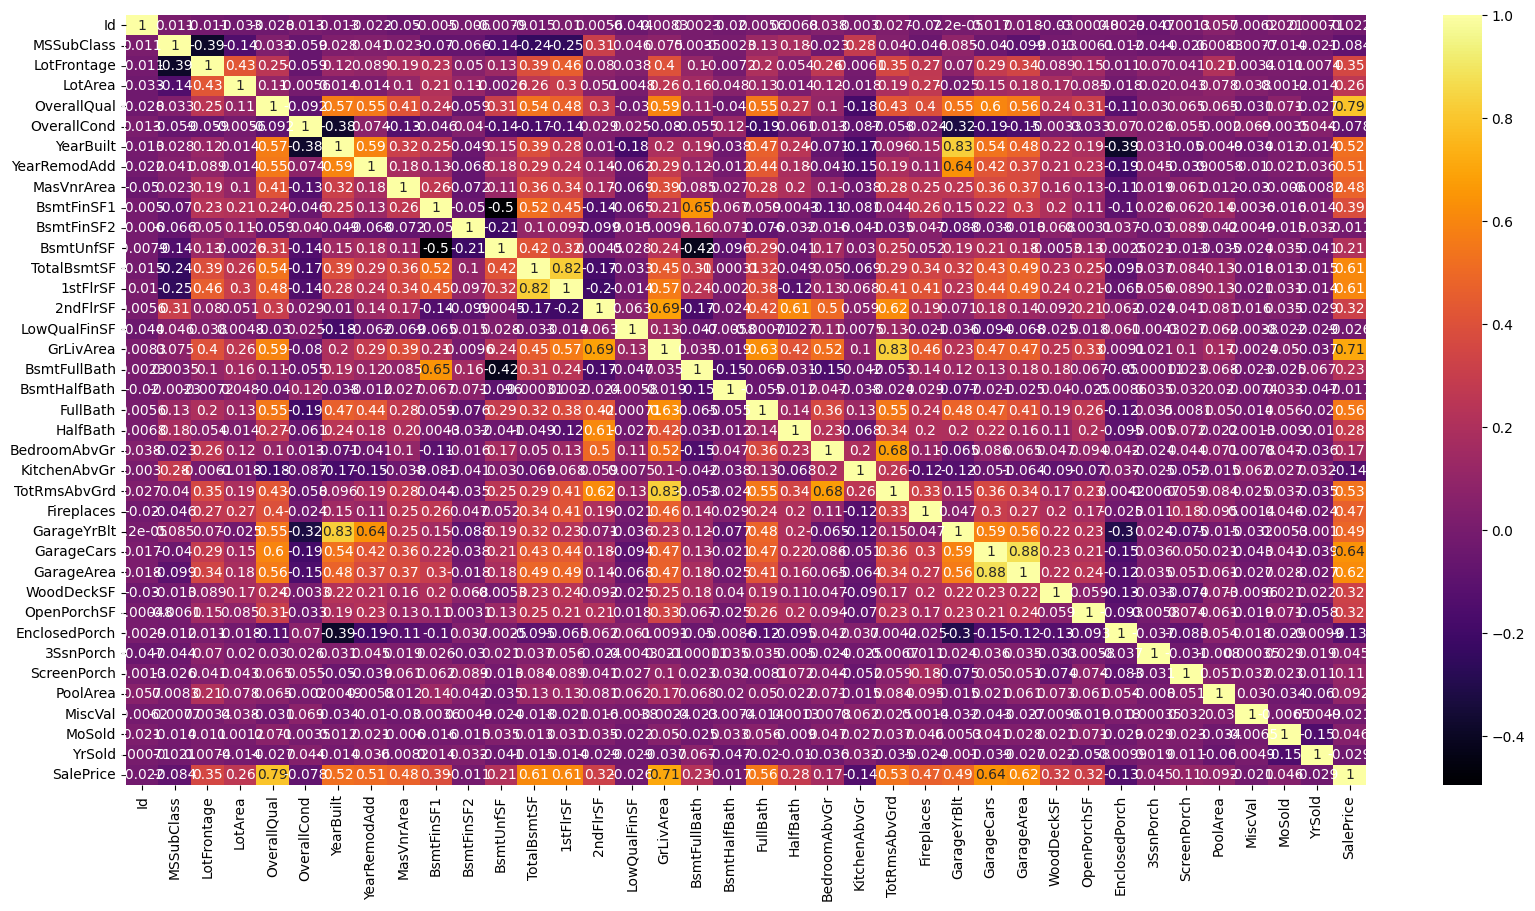

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(trainData.corr(), cmap="inferno", annot=True)
plt.show()

İlgileneceğimiz SalePrice özelliğinin en yüksek korelasyona sahip olduğu diğer özellikler (features):
- 0.79 => OverallQuality
- 0.71 => GriLivArea

(Negatif korelasyona sahip bir özellik göremedim)


#### Lot Frontage ve Lot Area'nın kde (kernel density estimate) plot'u

### SalePrice'ın OverallCondition ve YrSold ile Scatter Plot'u (x ekseni sadece ID belirtiyor)

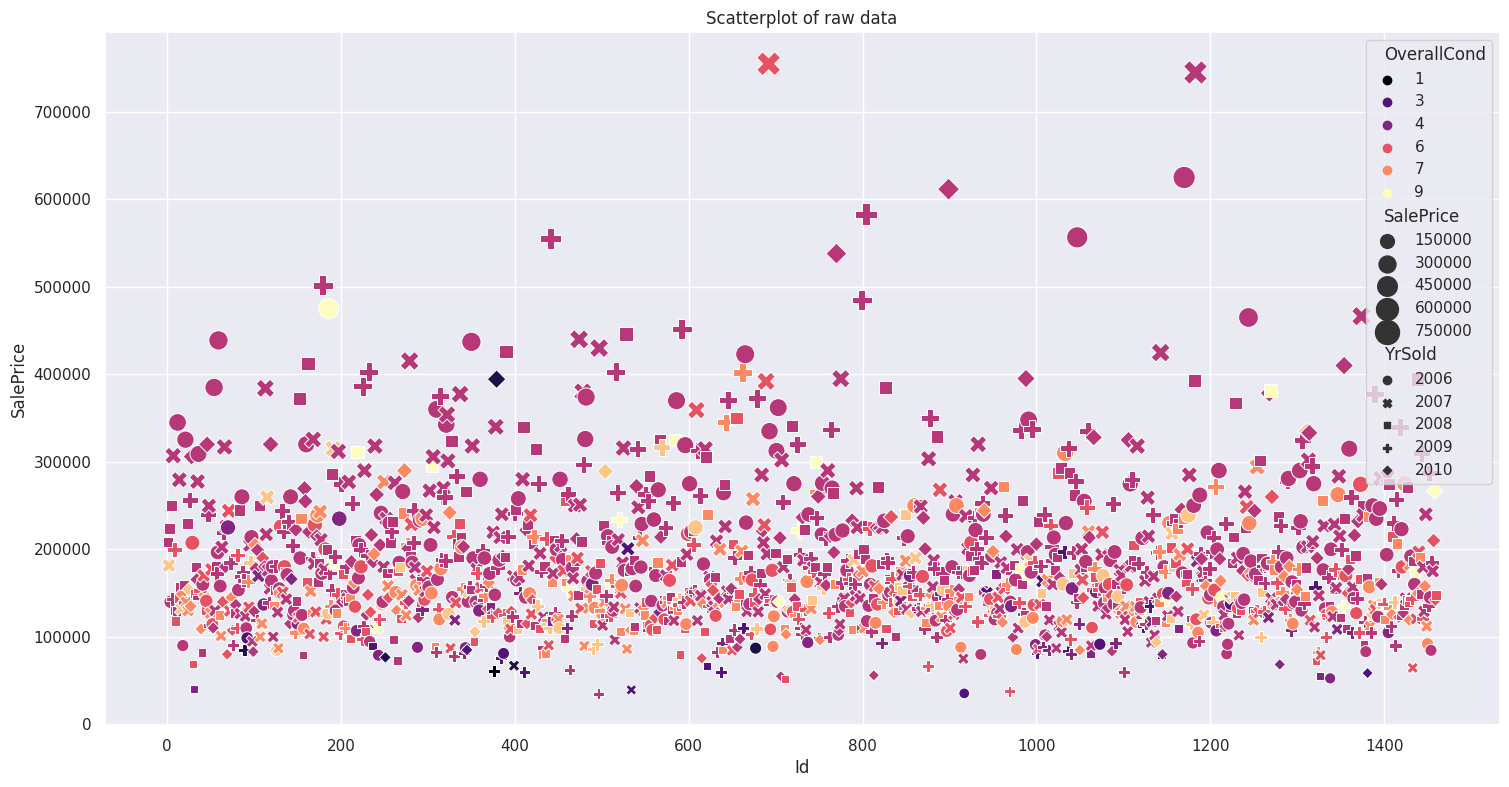

In [16]:
sns.set(rc={'figure.figsize':(18,9)})
sns.scatterplot(x=trainData.Id, y=trainData.SalePrice, size=trainData.SalePrice, hue=trainData.OverallCond, style=trainData.YrSold, sizes=(60,300), palette="magma")
plt.title('Scatterplot of raw data')
plt.show()

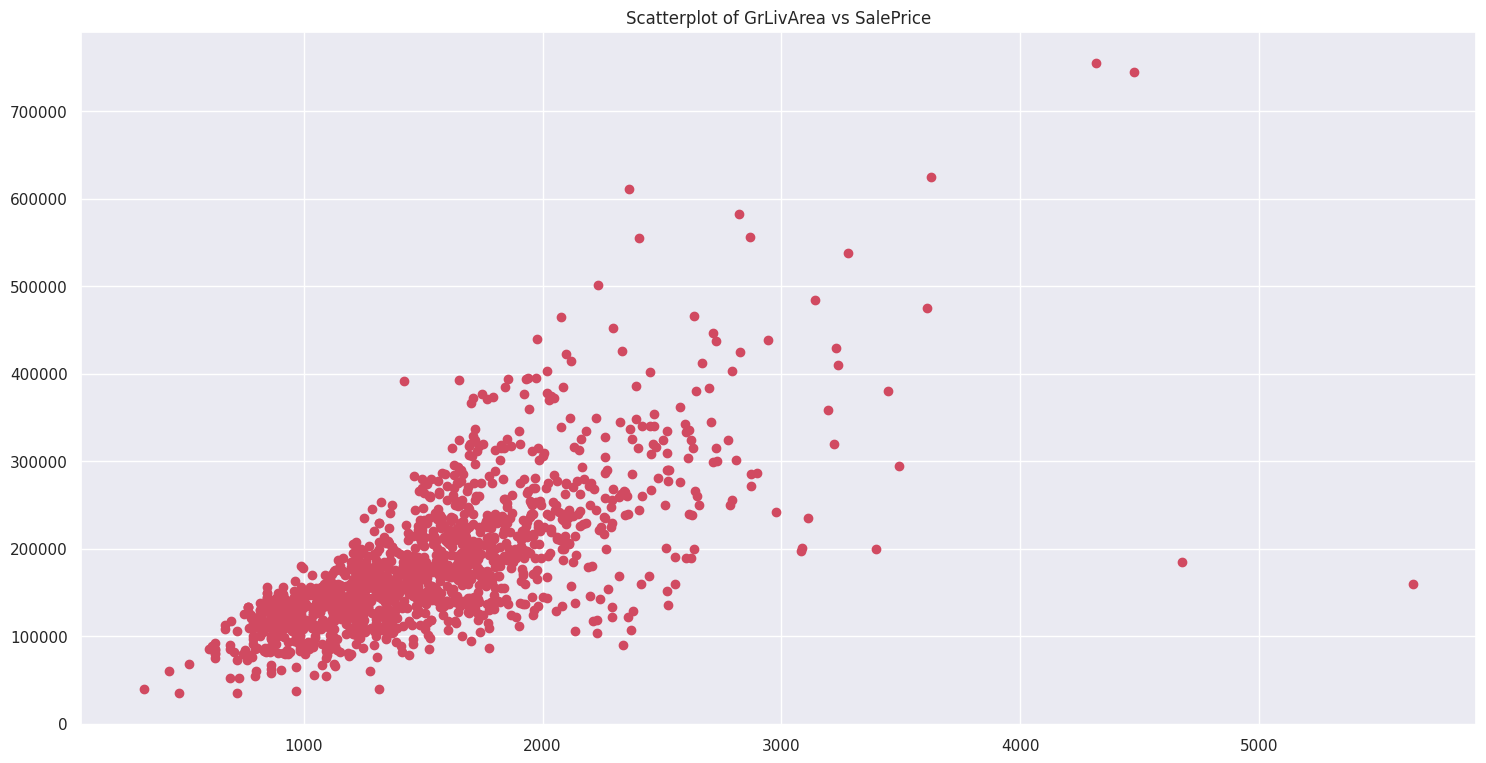

In [17]:
plt.scatter(trainData.GrLivArea, trainData.SalePrice, color=sns.color_palette('flare')[2])
plt.title('Scatterplot of GrLivArea vs SalePrice')
plt.show()

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

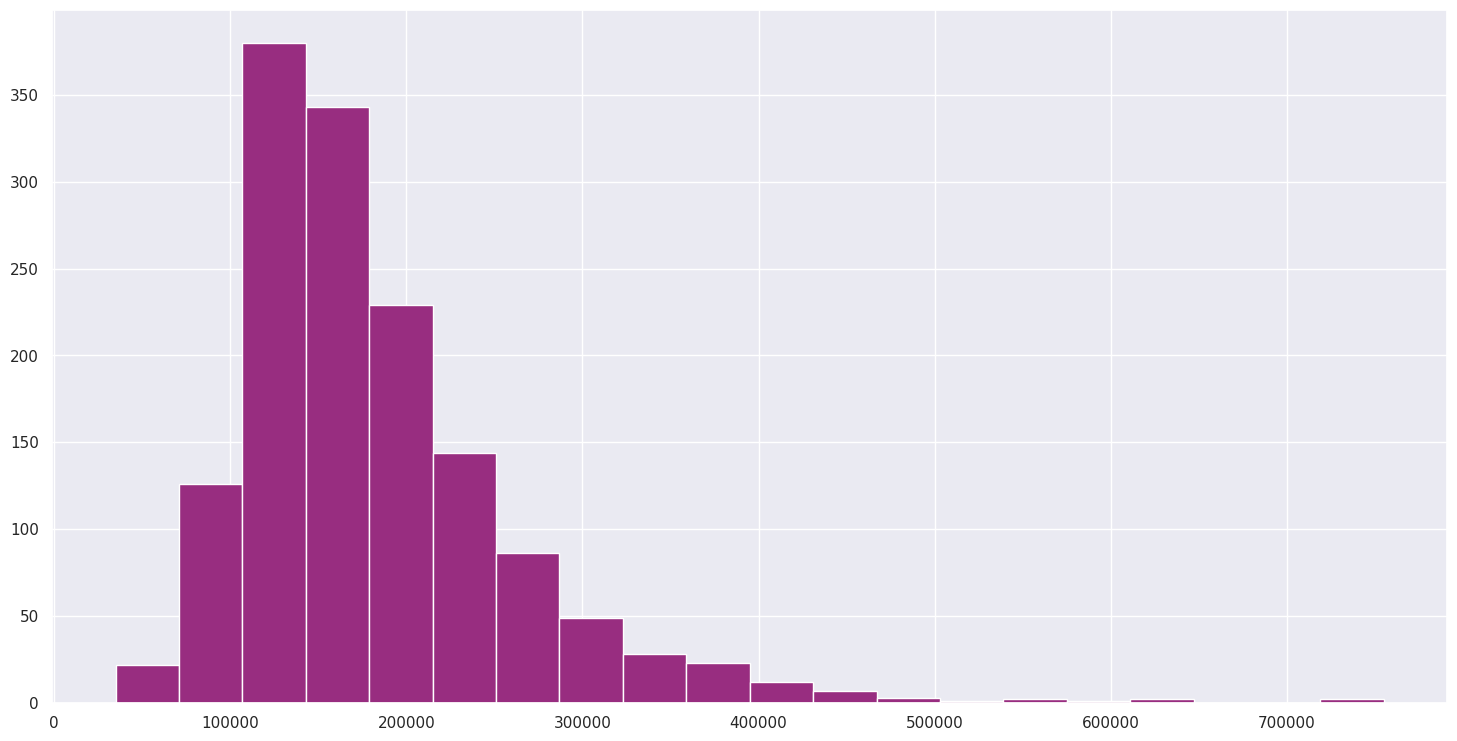

In [18]:
plt.hist(trainData.SalePrice, bins=20, color=sns.color_palette('magma')[2])

### Ön İşleme

#### Imputing (Eksik Değerleri Doldurma)
Simple Imputer ile eksik değerleri en sık tekrarlanan değer ile dolduruyoruz

In [19]:
# Strategy = most frequent value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
trainData = pd.DataFrame(imputer.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(imputer.fit_transform(testData), columns=testData.columns)

In [20]:
trainData.isnull().sum().sum()

0

In [21]:
testData.isnull().sum().sum()

0

### One-Hot Encoding
Sayısal olmayan değerleri farklı sütunlara ayırıp 0 ve 1 ile gösteriyoruz.

In [23]:
trainData = pd.get_dummies(trainData, columns=['MSZoning', 'Street',
                                               'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                                               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                                               'HouseStyle',
                                               'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                               'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                                               'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                               'BsmtFinType2', 'Heating',
                                               'HeatingQC', 'CentralAir', 'Electrical',
                                               'KitchenQual',
                                               'Functional', 'FireplaceQu', 'GarageType',
                                               'GarageFinish', 'GarageQual',
                                               'GarageCond', 'PavedDrive',
                                               'EnclosedPorch', '3SsnPorch', 'PoolQC',
                                               'Fence', 'MiscFeature', 'SaleType',
                                               'SaleCondition'])
lab = trainData.SalePrice.to_numpy()
trainData.drop(columns=['Id', 'SalePrice'], inplace=True)
trainData.head()

<ipython-input-23-218ce8c59506>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  trainData = pd.get_dummies(trainData, columns=['MSZoning', 'Street',
<ipython-input-23-218ce8c59506>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  trainData = pd.get_dummies(trainData, columns=['MSZoning', 'Street',


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
testData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal


In [25]:
testData = pd.get_dummies(testData, columns=[ 'MSZoning', 'Street',
                                               'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                                               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                                               'HouseStyle',
                                               'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                               'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                                               'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                               'BsmtFinType2', 'Heating',
                                               'HeatingQC', 'CentralAir', 'Electrical',
                                               'KitchenQual',
                                               'Functional', 'FireplaceQu', 'GarageType',
                                               'GarageFinish', 'GarageQual',
                                               'GarageCond', 'PavedDrive',
                                               'EnclosedPorch', '3SsnPorch', 'PoolQC',
                                               'Fence', 'MiscFeature', 'SaleType',
                                               'SaleCondition'])

testData.head()

<ipython-input-25-03246b14c5f1>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  testData = pd.get_dummies(testData, columns=[ 'MSZoning', 'Street',
<ipython-input-25-03246b14c5f1>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  testData = pd.get_dummies(testData, columns=[ 'MSZoning', 'Street',


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
trainData, testData = trainData.align(testData, join='inner', axis=1)

In [27]:
trainData.shape, testData.shape

((1460, 338), (1459, 338))

In [28]:
trainData.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [29]:
testData.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


## One Hot Encoding'e alternatif olarak Label Encoding Uygulaması:
Label Encoding, One Hot'a kıyasla daha az column'a sahip olmamıza yarayabilir, çünkü datayı kategorilere farklı sütunlarda binary olarak değil, tek bir sütunda tam sayı olarak ayırır.

In [ ]:
''' from sklearn.preprocessing import LabelEncoder

# Sample data
data = {
    'SaleType': ['A', 'B', 'C', 'A', 'D'],
    'SaleCondition': ['X', 'Y', 'X', 'Z', 'Y'],
    # ... gibi gibi devam edecek
}

df = pd.DataFrame(data)

# Fazla sayıda column olduğundan dolayı loop ile fit_transform yapıyoruz:
label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df)
'''


#### Training ve Test Set'e ayırma

In [30]:
#daha önce lab = trainData.SalePrice.to_numpy() yapmıştık

yTrain = lab
xTrain = trainData.to_numpy()
xTest = testData.to_numpy()

s = "Train set shape: {}\nTest set shape: {}\nTrain label shape: {}".format(xTrain.shape, xTest.shape, yTrain.shape)
print(s)

Train set shape: (1460, 338)
Test set shape: (1459, 338)
Train label shape: (1460,)


## Modeller

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()
lrModel.fit(xTrain, yTrain)

rsquare = lrModel.score(xTrain, yTrain)
print("R^2 score of training: {}".format(rsquare))


R^2 score: 0.9200568431086789


### Gradient Boosting Regression

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gbModel = GradientBoostingRegressor()
gbModel.fit(xTrain, yTrain)

rsquare = gbModel.score(xTrain, yTrain)
print("R^2 score: {}".format(rsquare))

R^2 score: 0.9664260499786058


### Support Vector Regression

In [34]:
from sklearn.svm import SVR
svModel = SVR()
svModel.fit(xTrain, yTrain)

rsquare = svModel.score(xTrain, yTrain)
print("R^2 score: {}".format(rsquare))

R^2 score: -0.05048980508467227


R^2 skorunun negatif gelmesinin birkaç sebebi şunlar olabilir:
- Modelimizde kullanılan regresyon türü veri yapısına uymuyor olabilir. Örneğin, doğrusal bir regresyon modeli, verinin doğrusal bir ilişki içermediği durumlarda negatif R-kare değerine yol açabilir.

- Model overfitting yapmış olabilir.

- Gerçek değerler ile tahmin değerleri arasında doğrusal olmayan bir ilişki olabilir.

SVR'ın R^2 skoru negatif geldiği için SVR'ın R^2 ile test edilmesi için uygun olmayabileceğini düşündüm (bir ihtimal)
Bu yüzden SMAPE skoru (error oranı) ile kıyaslamaya karar verdim. Kıyaslayabilmek adına daha önce denediğimiz modellerin de SMAPE skorunu hesapladım.

### Peki SMAPE nedir, R^2 nedir ?
- SMAPE, tahminlerin gerçek değerlere oranla yüzde olarak ne kadar yanlış olduğunu ölçen bir hata metriğidir. SMAPE hesaplanırken tahmin ve gerçek değer arasındaki farklar mutlak değerlere çevrildikten sonra yüzde hatalar hesaplanır.

- R-kare ise, bir regresyon modelinin ne kadar iyi uyum sağladığını gösteren bir metriktir. Gözlemlenen değişkenliğin, tahmin edilen değişkenliğe oranını ifade eder.

-  SMAPE pozitif veya negatif değerlere sahip olabilirken, R-kare her zaman 0 ile 1 arasında bir değer alır. Negatif R-kare, modelin sadece ortalama tahminde bulunduğunu gösterirken, SMAPE'de böyle bir anlam yoktur.


In [35]:
def SMAPE(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

#### Tüm modellerin SMPE oranı. Error oranı en düşükten en yükseğe:  
1. Gradient Boost
2. Linear Regression
3. SVR

In [36]:
svError = SMAPE(yTrain, svModel.predict(xTrain))

gbError = SMAPE(yTrain, gbModel.predict(xTrain))

lrError = SMAPE(yTrain, lrModel.predict(xTrain))

print("svError: {}\ngbError: {}\nlrError: {}".format(svError, gbError, lrError))



svError: 30.05818477173172
gbError: 6.393850590969554
lrError: 8.179761341198407
lgbmError: 3.3713067914086325


#### KNN Regression

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knnModel = KNeighborsRegressor(n_neighbors=5)
knnModel.fit(xTrain, yTrain)

rsquare = knnModel.score(xTrain, yTrain)
print("R^2 score: {}".format(rsquare))
print("SMAPE: " , SMAPE(yTrain, knnModel.predict(xTrain)))

R^2 score: 0.7860917449426212
SMAPE:  12.657038854617689


#### Decision Tree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtModel = DecisionTreeRegressor(max_depth=5)
dtModel.fit(xTrain, yTrain)

rsquare = dtModel.score(xTrain, yTrain)
print("R^2 score: {}".format(rsquare))
print("SMAPE: " , SMAPE(yTrain, dtModel.predict(xTrain)))

R^2 score: 0.8618560549553314
SMAPE:  12.728307206895824


In [45]:
yTrain=yTrain.astype('int')

In [46]:
xTrain = xTrain.astype('int')

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfModel =  RandomForestRegressor(max_depth=2, random_state=0)
rfModel.fit(xTrain, yTrain)

rsquare = rfModel.score(xTrain, yTrain)
print("R^2 score: {}".format(rsquare))
print("SMAPE: " , SMAPE(yTrain, rfModel.predict(xTrain)))

R^2 score: 0.701433100424957
SMAPE:  17.467324544875517


### Modellerin Skorları:

| Modeller                   	| R^2                  	| SMAPE              	|
|----------------------------	|----------------------	|--------------------	|
| Linear Regression          	|  0.9200568431086789  	| 8.179761341198407  	|
| SVR                        	| -0.05048980508467227 	| 30.05818477173172  	|
| Gradient Boost             	| 0.9664260499786058   	|  6.393850590969554 	|
|  KNN Regression           	| 0.7860917449426212   	| 12.657038854617689 	|
|  Decision Tree Regression 	| 0.8618560549553314   	| 12.728307206895824 	|
|  Random Forest Regression  	| 0.701433100424957   	| 17.467324544875517 	|


##### Hem R^2'nin yüksek olması olması hem de SMAPE değerinin en düşük olması sebebiyle en iyi performansı Gradient Boost modelimiz gösterdi

# **Görev 02**

## Overfitting Nedir?

- Overfitting eğittiğimiz modelin gereğinden fazla çalışıp ezber yapmaya başlaması ve özgün olmayan sonuçlar vermesidir.
- Bu durum model fazla karışık olduğunda (örneğin fazla değişken (feature) bulunması) durumunda gerçekleşebilir
- Bu modeller training set'te çok iyi bir tahmin performansı sergieleyecek fakat eğitilmemiş (test) sette çok iyi tahminleme yapamayacaktır.
- Model veriler arasından gerçek ilişkier kurmaktansa gürültüleri ezberleyecektir.
-Overfitting problemi olan modellerde yüksek varyans, düşük bias durumu görülmektedir.

## Underfitting Nedir?

- Underfitting'in aksine model, training set'teki verileri yeteri kadar öğrenemez, yetersiz öğrenir. Underfitting gösteren model, ne training ne de test setinde iyi performans gösterir.
- Underfitting, overfitting'e göre genelde daha az karşılanan bir sorundur.
- Düşük varyans ve yüksek bias’a sahiptir.

## Overfitting'i Nasıl Engelleyebiliriz?

1. Verisetindeki veri miktarını artırarak
2. Kullanılacak modeller için Feature Selection uygulayarak
3. Veri setinde cross-validation uygulayarak
4. Regularization uygulayarak (Verisetinin kompleksliği azaltılır) En popüler olan regülarize etme teknikleri Lasso (L1) ve Ridge' (L2) kullanılabilir.


### Elde ettiğimiz modellerde overfitting görüldü mü?

Overfitting görülen modellerde training sette başarılı çalışmasına rağmen test sette iyi performans elde edilmez. Bunun için test setimizin de performansını ölçmemiz gerekir